# Titanic Passenger Data Analysis

## Project Objective
This Project will explore the demographics and passenger information provided for 891 of the 2224 passengers and crew that were on board the Titanic.

Data was provided as a CSV by [Kaggle](https://www.kaggle.com/c/titanic/data)

## Project Questions
1. What factors made people more likely to survive?


In [1]:
git remote add origin https://github.com/AdkinsWx/Udacity_Titanic.git
git push -u origin master

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from IPython.display import display
%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-1-c9f8d101e85e>, line 1)

## Data Wrangling

### Possible Issues with the Data
After viewing the table below we can see that not all data points are accounted for. For instance on Line [5], Mr. James Moran's age and cabin number are missing (Some even have multiple cabin numbers). It may be better to insert a 0 for the missing age and "Unknown" for the missing cabin number.



In [115]:
#Views a piece of the data table to verify if there are any pieces of the data that needs to be cleaned
sample_data = pd.read_csv('titanic-data.csv')
display(sample_data.head(20))



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


29.69911764705882

While observing the table I also wanted to know if the data type for Ticket was a string for each row.
Using the function below we can see the value types.

In [102]:
#The following checks the data type of a desired column
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype
from pandas.api.types import is_bool

sample_data.dtypes



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [116]:
#The following codes replaces NaN in the Cabin column with Unknown


sample_data['Cabin'].fillna('unkown', inplace = True)
display(sample_data.head(20))



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unkown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unkown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unkown,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,unkown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,unkown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,unkown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,unkown,C


## Exploratory Data Analysis


In [139]:
#After utiliing the .describe() function we get an unexpected value for minimum Age - .42 (years)
#This should convert to 151 days old
#I decided to leave the data uncahnged in this respect as the .42 years is still correct 
#even if it is not initially intuitive    

sample_data.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


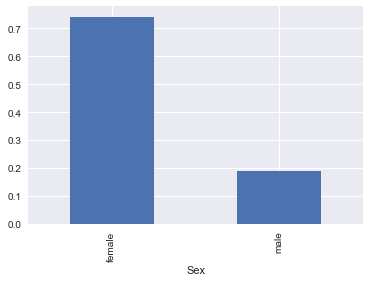

In [190]:

titantic_male = sample_data.groupby(['Sex']).mean()

display(titantic_male)

titantic_male['Survived'].plot(kind='bar')

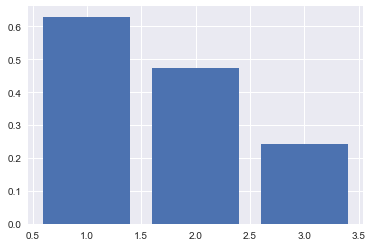

In [221]:

titanic_class = sample_data.groupby(['Pclass']).mean().reset_index()

plt.bar(titanic_class['Pclass'], titanic_class['Survived'])


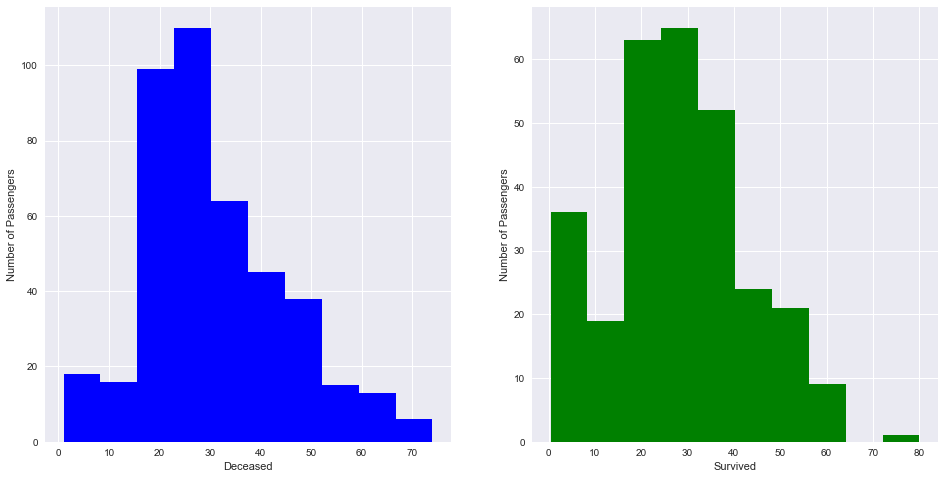

In [203]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
titanic_age = sample_data.groupby('Survived')
color=['b', 'g']

for ind, grp in titanic_age:
    grp['Age'].plot(kind='hist', color=color[ind], ax = axs[ind])

axs[0].set_xlabel('Deceased')
axs[0].set_ylabel('Number of Passengers')

axs[1].set_xlabel('Survived')
axs[1].set_ylabel('Number of Passengers')

### Male Only Data

In [205]:
#Now I wanted to get statistics based on gender
male_df = (sample_data.loc[sample_data['Sex'] == 'male'])

display(male_df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


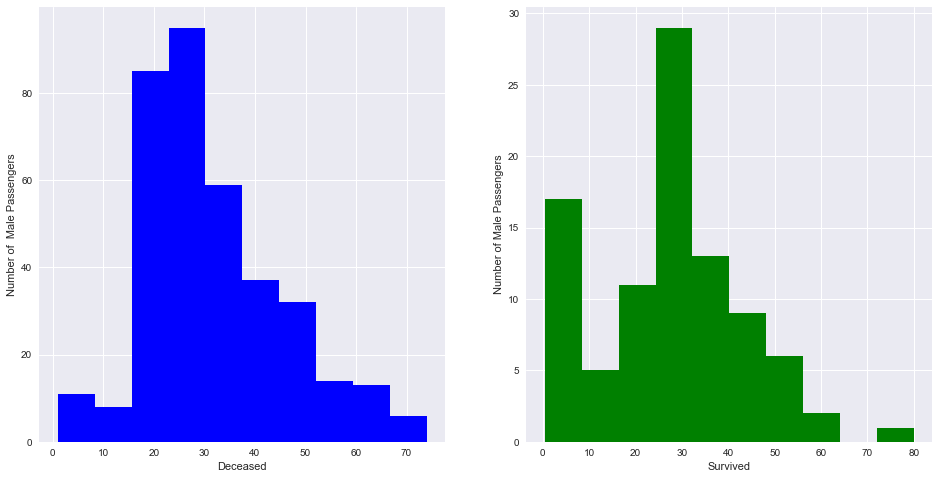

In [222]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

male_survived = male_df.groupby('Survived')
color=['b','g']
for ind, grp in male_survived:
    grp['Age'].plot(kind='hist', color=color[ind], ax = axs[ind])
axs[0].set_xlabel('Deceased')
axs[0].set_ylabel('Number of  Male Passengers')

axs[1].set_xlabel('Survived')
axs[1].set_ylabel('Number of Male Passengers')

### Female Only Data

In [214]:
female_df = (sample_data.loc[sample_data['Sex'] == 'female'])
print ('Female Table')
display(female_df.describe())

Female Table


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,314.000000,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000
mean,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
std,256.846324,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,231.750000,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875
50%,414.500000,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,641.250000,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000
max,889.000000,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


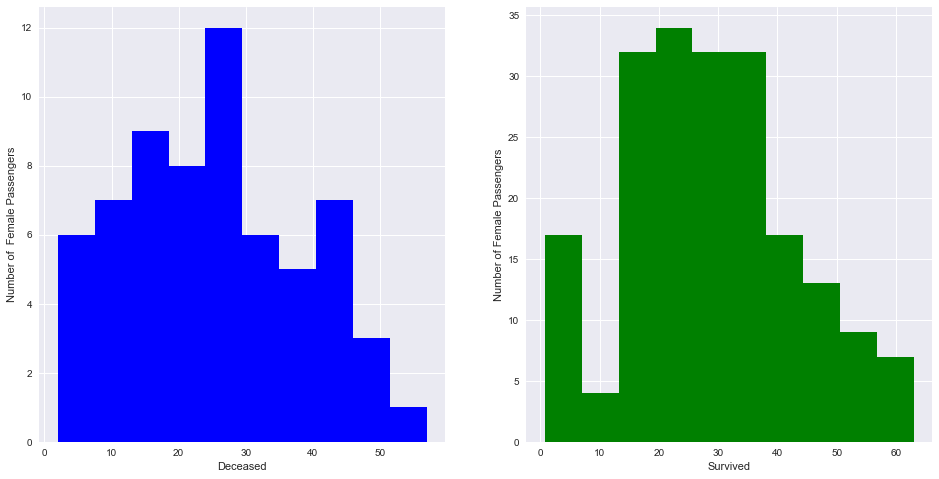

In [219]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

female_survived = female_df.groupby('Survived')
color=['b','g']
for ind, grp in female_survived:
    grp['Age'].plot(kind='hist', color=color[ind], ax = axs[ind])
axs[0].set_xlabel('Deceased')
axs[0].set_ylabel('Number of  Female Passengers')

axs[1].set_xlabel('Survived')
axs[1].set_ylabel('Number of Female Passengers')